# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set(style = "darkgrid") 

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Сиды фиксируем для воспроизводимости полученных результатов")
print("Кстати, есть забавная статья https://arxiv.org/abs/2109.08203 под названием Seed 3407 is all you need (по аналогии с Attention is all you need)")
      
      

Сиды фиксируем для воспроизводимости полученных результатов
Кстати, есть забавная статья https://arxiv.org/abs/2109.08203 под названием Seed 3407 is all you need (по аналогии с Attention is all you need)


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include=['object', 'int', 'float'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В столбцах mileage, engine, max_power, torque, seats (где значение отлично от 0) как в тесте, так и в трейне

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
df_train_feature = df_train.drop(['selling_price'], axis=1)
print(df_train_feature.shape, df_train.shape)

(6999, 12) (6999, 13)


In [11]:
print('Количество уникальных объектов:', df_train_feature.drop_duplicates().shape[0])
dfh = df_train_feature.groupby(df_train_feature.columns.tolist()).size().reset_index().rename(columns={0:'records'})
dfh.head()

Количество уникальных объектов: 5840


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,records
0,Ambassador CLASSIC 1500 DSL AC,2000,90000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1489 CC,35.5 bhp,72.9Nm@ 2250rpm,5.0,1
1,Ambassador Classic 2000 DSZ AC PS,1994,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,1
2,Ambassador Grand 2000 DSZ PW CL,2008,80000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,1
3,Audi A3 35 TDI Premium Plus,2017,70000,Diesel,Individual,Automatic,First Owner,20.38 kmpl,1968 CC,143 bhp,320Nm@ 1750-3000rpm,5.0,1
4,Audi A3 35 TDI Premium Plus,2018,20000,Diesel,Individual,Automatic,First Owner,20.38 kmpl,1968 CC,143 bhp,320Nm@ 1750-3000rpm,5.0,1


In [12]:
print('Количество уникальных объектов, которые имеют несколько дублей:', dfh[dfh['records'] > 1].shape[0])
print('Количество объектов, которые имеют несколько дублей:', dfh.loc[dfh['records'] > 1, 'records'].sum())

Количество уникальных объектов, которые имеют несколько дублей: 624
Количество объектов, которые имеют несколько дублей: 1767


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
dfh[dfh['records'] > 1]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,records
21,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
25,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
26,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
39,BMW 3 Series 320d Luxury Line,2012,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
41,BMW 3 Series 320d Luxury Line Plus,2017,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,40000,Diesel,Dealer,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0,2
5606,Volkswagen Vento 1.5 TDI Highline AT,2016,60000,Diesel,Individual,Automatic,First Owner,22.15 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0,2
5627,Volkswagen Vento Diesel Highline,2012,90000,Diesel,Individual,Manual,First Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0,3
5649,Volvo V40 D3 R-Design,2018,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0,23


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# your code here
FEATURES_SUBSET = df_train_feature.columns.tolist()
df_train = df_train.drop_duplicates(subset=df_train_feature.columns.tolist())

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [17]:
df_train = df_train.reset_index(drop=True)
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [18]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0]))
df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]))
df_train['max_power'] = df_train['max_power'].apply(lambda x: str(x).strip())
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x.split()[0]) if x[0] != 'b' else 0)

df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0]))
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]))
df_test['max_power'] = df_test['max_power'].apply(lambda x: str(x).strip())
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x.split()[0]) if x[0] != 'b' else 0)

In [19]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


In [20]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

In [21]:
def parse_torque(df_table):
    """
    Как бы мы жили без if и else? И на этот риторический вопрос даже не ответишь
    "Если бы да кабы", ведь в ответе содержится if
    """
    max_torque_rpm_arr, torque_only_arr = [], []
    for row_idx, row in df_table.iterrows():
        if str(row['torque']) != 'nan':
            torque_str = str(row['torque']).lower()
            if '@' in torque_str:
                torque_split = torque_str.split('@')
            elif 'at' in torque_str:
                torque_split = torque_str.split('at')
            elif '/' in torque_str:
                torque_split = torque_str.split('/')
            else:
                torque_only = float(torque_str.split('nm')[0].strip())
                max_torque_rpm = None

            torque_only_str = torque_split[0]
            if 'nm' in torque_only_str:
                torque_only = float(torque_str.split('nm')[0].strip())
            elif 'kgm' in torque_only_str:
                torque_only = float(torque_str.split('kgm')[0].strip()) * 9.80665
            else:
                if '(' in torque_only_str:
                    torque_only_str = torque_only_str.split('(')[0].strip()
                torque_only = float(torque_only_str)
                if torque_only < 90:
                    torque_only *= 9.80665

            max_torque_rpm_str = torque_split[1]
            if '-' in max_torque_rpm_str:
                max_torque_rpm_str = max_torque_rpm_str.split('-')[1]
            elif '~' in max_torque_rpm_str:
                max_torque_rpm_str = max_torque_rpm_str.split('~')[1]

            if 'rpm' in max_torque_rpm_str:
                max_torque_rpm_str = max_torque_rpm_str.replace(',', '')
                max_torque_rpm = float(max_torque_rpm_str.split('rpm')[0])
            elif '(' in max_torque_rpm_str:
                max_torque_rpm_str = max_torque_rpm_str.replace(',', '')
                max_torque_rpm = float(max_torque_rpm_str.split('(')[0])
            else:
                max_torque_rpm_str = max_torque_rpm_str.replace(',', '')
                max_torque_rpm = float(max_torque_rpm_str) 
        else:
            max_torque_rpm, torque_only = None, None
        max_torque_rpm_arr.append(max_torque_rpm)
        torque_only_arr.append(torque_only)
    return max_torque_rpm_arr, torque_only_arr

In [22]:
max_torque_rpm_arr, torque_only_arr = parse_torque(df_train_copy)
df_train_copy['max_torque_rpm'] = max_torque_rpm_arr
df_train_copy['torque_only'] = torque_only_arr

max_torque_rpm_arr, torque_only_arr = parse_torque(df_test_copy)
df_test_copy['max_torque_rpm'] = max_torque_rpm_arr
df_test_copy['torque_only'] = torque_only_arr

df_train_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,torque_only
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,2000.0,190.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2500.0,250.000000
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,2750.0,219.668960
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,4500.0,112.776475
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,4000.0,113.750000


Мне кажется тут не хватает вопроса. Я добавлю. <font color='#FF6600'>Стоило ли это 0.25?</font> Ответ нет, я бы это в чуть больший балл) 

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [23]:
fill_dict = {
    'mileage': df_train['mileage'].median(), 
    'engine': df_train['engine'].median(), 
    'max_power': df_train['max_power'].median(), 
    'seats': df_train['seats'].median(), 
}
df_train = df_train.fillna(value=fill_dict)
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [24]:
print("Так как автобусы очень дорогие) Количество сидений принимает значение из какого-то ограниченного множества. Чаще")
print("всего это 2, 4, 7 и какие-нибудь автобусы. Так что хоть признак и численный, качество может стать лучше, если")
print("рассматривать его как категориальный. Возможно он не линейно действует на целевую переменную, например:")
print("машины с 2 и 30 сидениями дорогие, так как это спорткары и автобусы, а с 4, 7 сидениями дешевле. Нелинейная зависимость.")
print("Именно поэтому иногда даже полность вещественные признаки бьют на бины и рассматривают как категориальный (возраст, например)")
print("В общем, мы работаем с линейными моделями - тут почти вся работа заключается в грамотной обработке признаков")

Так как автобусы очень дорогие) Количество сидений принимает значение из какого-то ограниченного множества. Чаще
всего это 2, 4, 7 и какие-нибудь автобусы. Так что хоть признак и численный, качество может стать лучше, если
рассматривать его как категориальный. Возможно он не линейно действует на целевую переменную, например:
машины с 2 и 30 сидениями дорогие, так как это спорткары и автобусы, а с 4, 7 сидениями дешевле. Нелинейная зависимость.
Именно поэтому иногда даже полность вещественные признаки бьют на бины и рассматривают как категориальный (возраст, например)
В общем, мы работаем с линейными моделями - тут почти вся работа заключается в грамотной обработке признаков


In [25]:
df_train['seats'] = df_train['seats'].apply(lambda x: int(x))
df_train['engine'] = df_train['engine'].apply(lambda x: int(x))

df_test['seats'] = df_test['seats'].apply(lambda x: int(x) if str(x) != 'nan' else x)
df_test['engine'] = df_test['engine'].apply(lambda x: int(x) if str(x) != 'nan' else x)

df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [26]:
FEATURES_SUBSET_NUM = []
for fn, dt in df_train.dtypes.iteritems():
    if 'int' in str(dt) or 'float' in str(dt):
        FEATURES_SUBSET_NUM.append(fn)

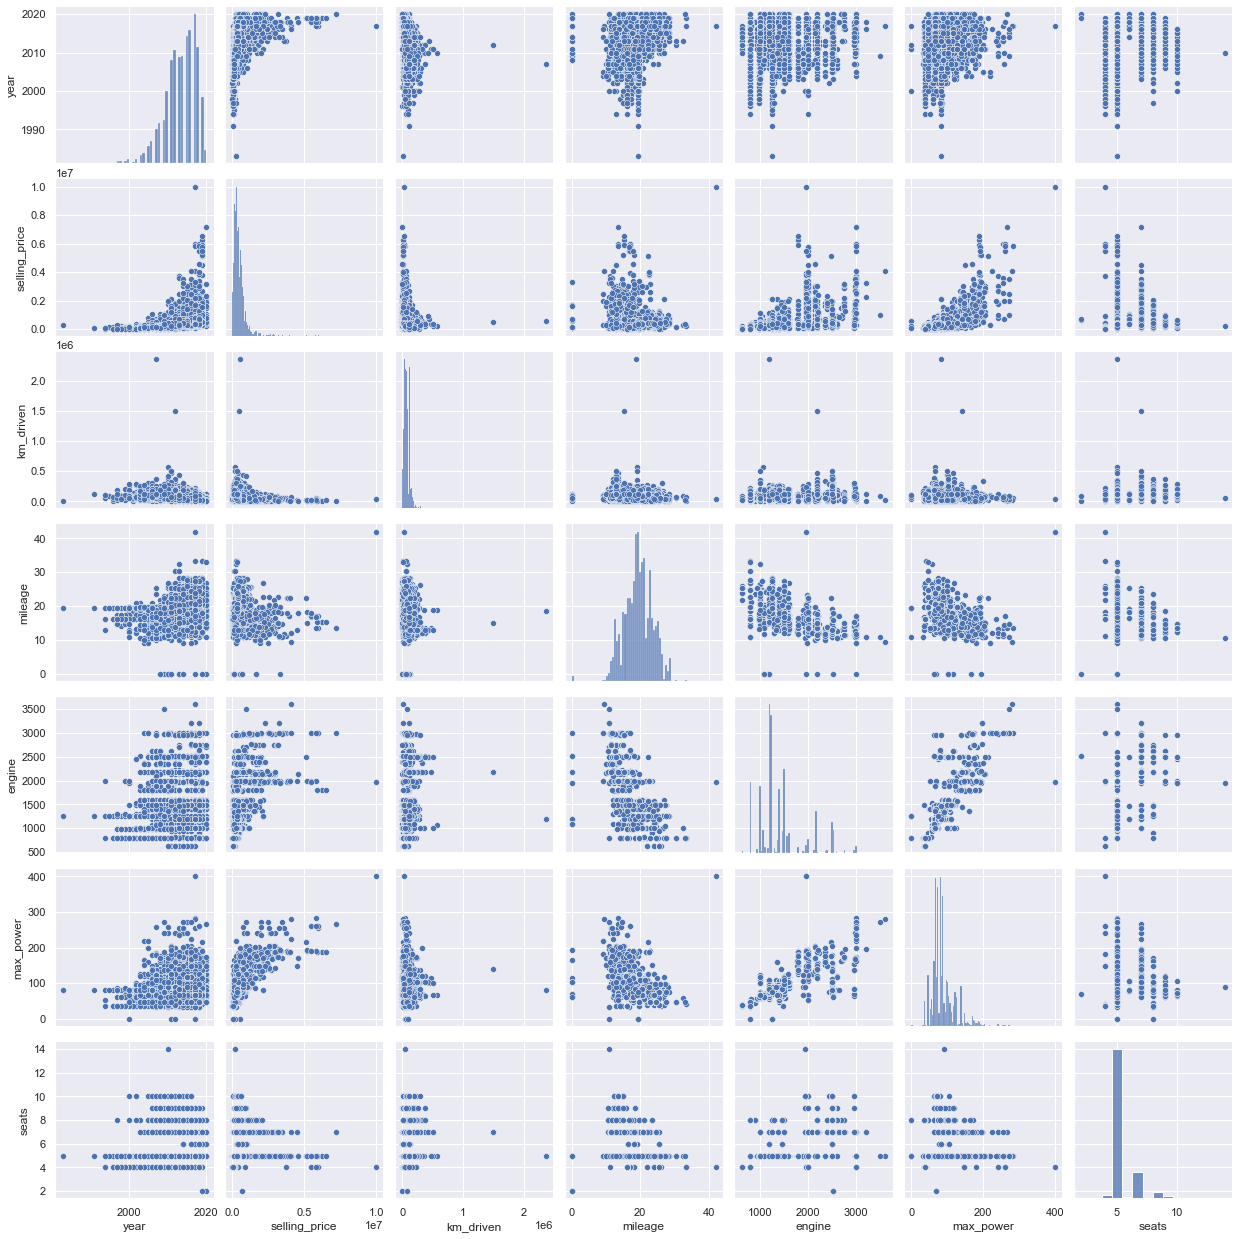

In [27]:
sns.pairplot(
    df_train,
    x_vars=FEATURES_SUBSET_NUM,
    y_vars=FEATURES_SUBSET_NUM
)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Видно, что с целевой переменной есть связь у max_power, engine и year (в меньшей степени, но какая-то связь есть). По этим признакам можно хоть что-то предположить о целевой переменной (на основе графиков), остальные же признаки связаны слабо. 

Между собой явно коррелируют engine и max_power, остальные признаки практически не коррелируют.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

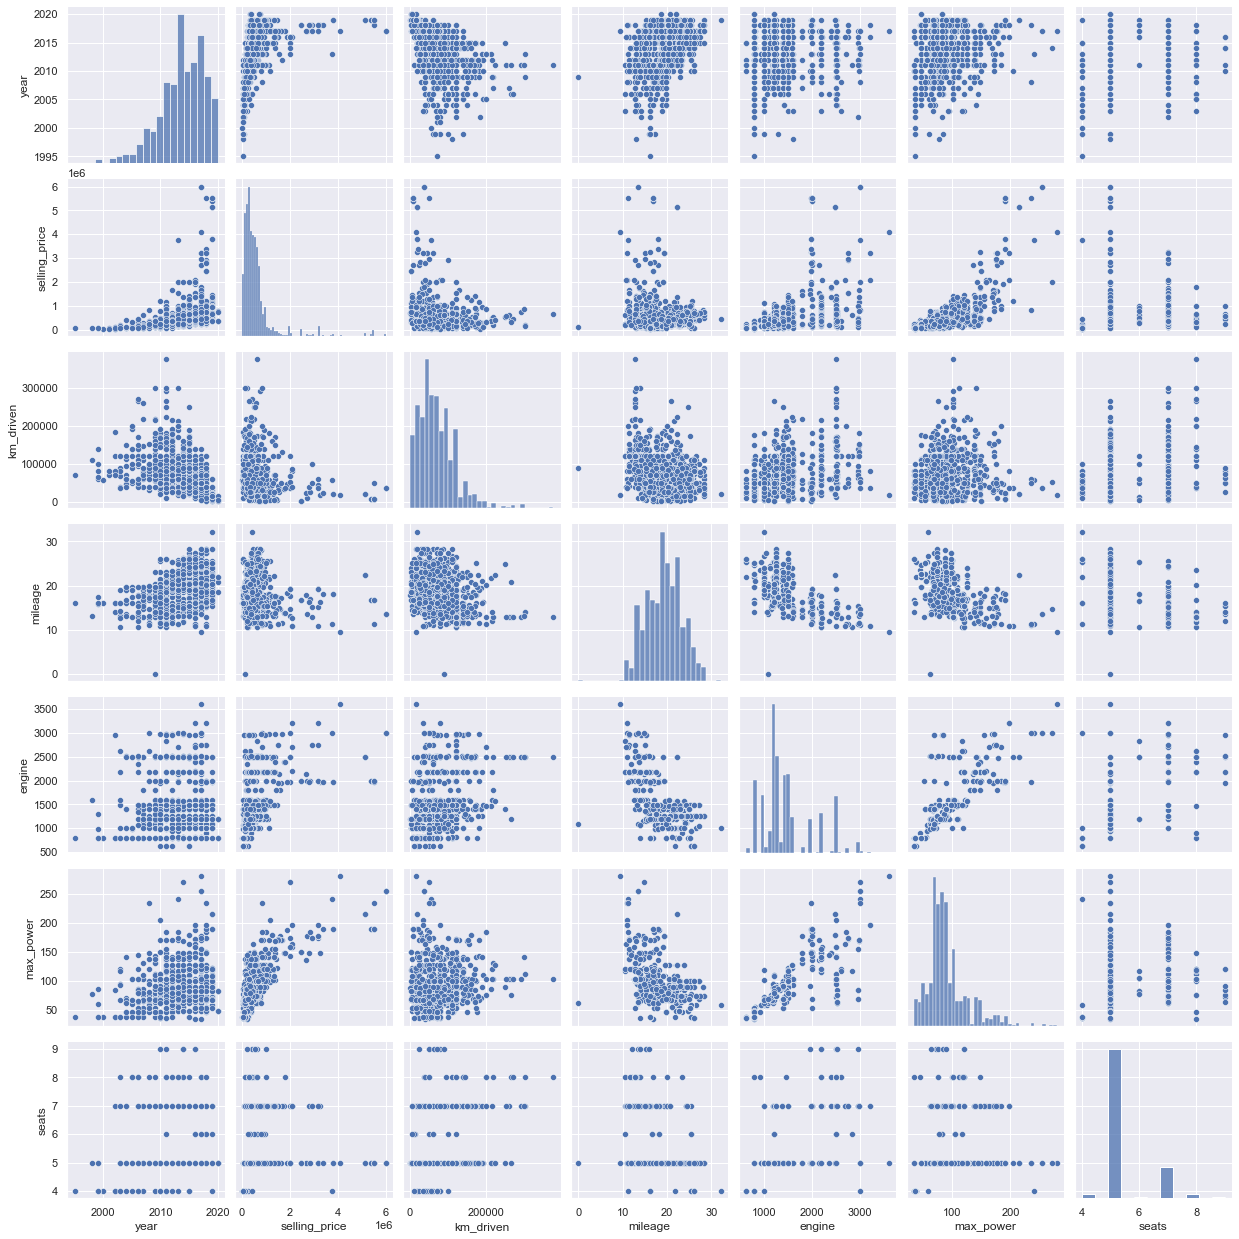

In [28]:
sns.pairplot(
    df_test,
    x_vars=FEATURES_SUBSET_NUM,
    y_vars=FEATURES_SUBSET_NUM
)

Я бы сказал, что при разделении на трейн и тест совокупности оказались похожими

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

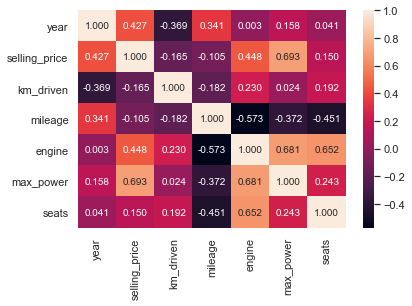

In [29]:
sns.heatmap(df_train[FEATURES_SUBSET_NUM].corr(), annot=True, fmt=".3f")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Во-первых заметим, что наши выводы в первом пункте оказались верны. Наиболее скореллированные признаки с целевой переменной: max_power, engine и selling_price

Какие 2 признака наименее скоррелированы между собой? year & engine, year & seats, km_driven & max_power 

Между какими наблюдается довольно сильная положительная линейная зависимость? max_power & engine

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Коэффициент корреляции = -0.4, что говорить о существовании слабой корреляции. Да, такое утверждение имеет место быть с важной оговоркой в виде "скорее всего" 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='engine'>

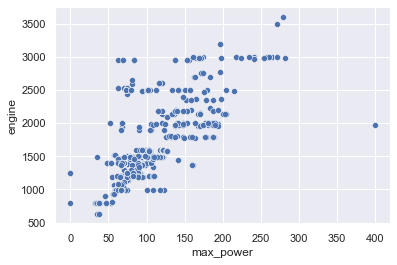

In [30]:
sns.scatterplot(data=df_train, x = "max_power", y = "engine")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Мы неплохо визуалировали зависимости числовых признаков, однако совсем не смотрели на категориальные. Порисуем ящики с усами) 

In [31]:
FEATURES_SUBSET_OBJ = []
for fn, dt in df_train.dtypes.iteritems():
    if 'object' in str(dt):
        FEATURES_SUBSET_OBJ.append(fn)

In [32]:
FEATURES_SUBSET_OBJ

['name', 'fuel', 'seller_type', 'transmission', 'owner']

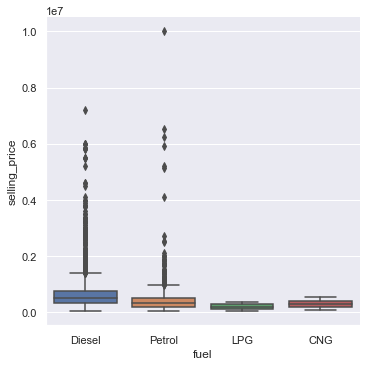

In [33]:
sns.catplot(data=df_train, x='fuel', y="selling_price", kind='box')

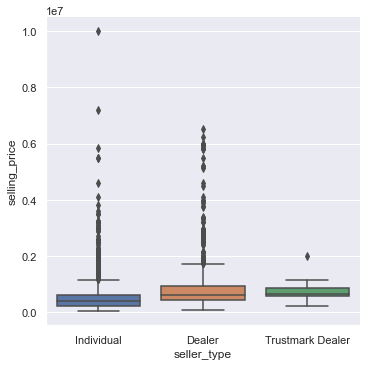

In [34]:
sns.catplot(data=df_train, x='seller_type', y="selling_price", kind='box')

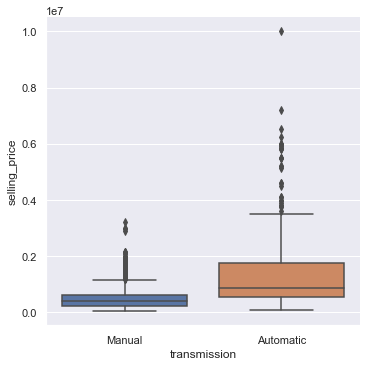

In [35]:
sns.catplot(data=df_train, x='transmission', y="selling_price", kind='box')

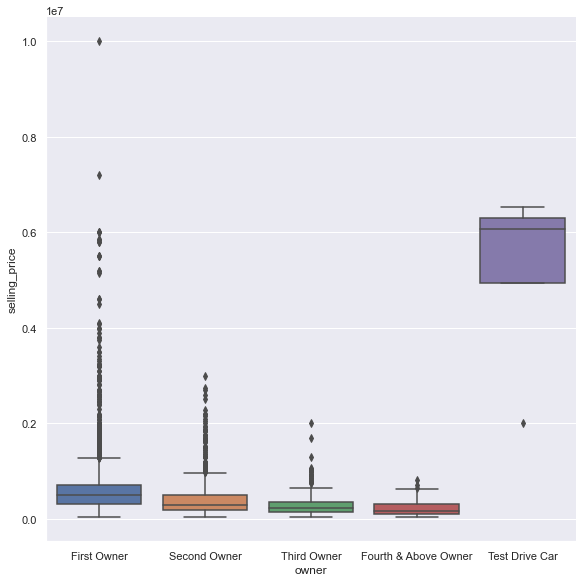

In [36]:
sns.catplot(data=df_train, x='owner', y="selling_price", kind='box', height=8)

Какой-то сильной зависимости категориальных признаков на целевую переменную нет, однако можно сделать следующие предположения: 
- если машина продается первый раз (первый владелец) или покупается автомобиль с тест-драйва, то вероятность большой цены растет
- машины с АКП дороже в среднем, чем с РКП

Посмотрим на распределения категориальных признаков. Возможно непопулярные категории в будущем есть смысл объединить воедино с целью облегчения (сокращения признакового пространства) модели

<AxesSubplot:xlabel='fuel', ylabel='count'>

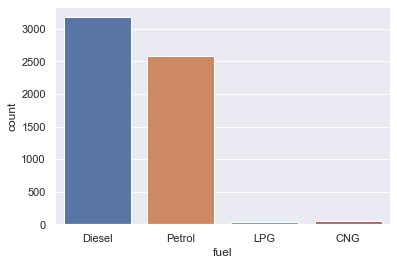

In [37]:
sns.countplot(data=df_train, x='fuel')

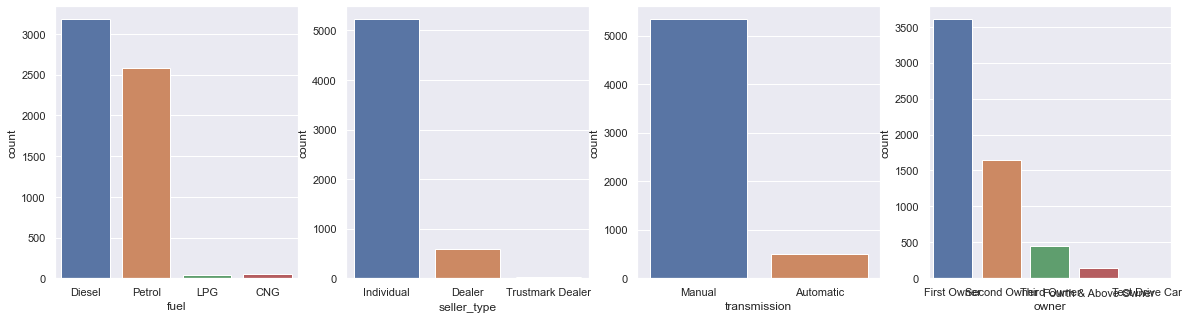

In [38]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
for i, feat_name in enumerate(['fuel', 'seller_type', 'transmission', 'owner']):
    sns.countplot(x=feat_name, data=df_train, ax=ax[i])

Можно видеть, что почти во всех категориальных признаках преобладают 1-2 категории, а остальные встречаются сильно реже. 

Стоит также отметить, что мы не использовали здесь в анализе признак name. Почему? Так как там много разных значений и использование этого признака в сыром виде гарантированно приведет к переобучению. Любая новая модель автомобиля и модель сломалась. Тут можно будет в дальнейшем извлечь название марки, она более содержательна в этом плане

Также более явно посмотрим на распределение целевой переменной: 

/Users/shapkin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

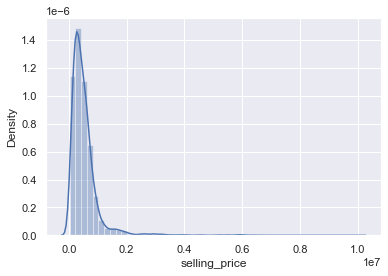

In [39]:
sns.distplot(df_train['selling_price'])

Можно видеть, что есть выбросы. Найдем их: 

In [40]:
df_train[df_train['selling_price'] > 0.45 * 1e7]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
118,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487,214.56,5
121,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987,254.79,5
124,BMW X4 M Sport X xDrive20d,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5
132,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987,282.00,5
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969,400.00,4
251,Mercedes-Benz GL-Class 220d 4MATIC Sport,2018,4600000,7976,Diesel,Individual,Automatic,First Owner,17.90,2143,170.00,5
330,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995,190.00,5
871,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993,261.40,4
2283,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993,265.00,7
3406,BMW 5 Series 520d Luxury Line,2019,5200000,10000,Diesel,Dealer,Automatic,First Owner,18.12,1995,190.00,5


Видим, что это не выбросы. Это просто дорогие модели и их в выборке не так много. Как идея: сперва предсазываем порядок цены (класс автомобиля), а затем уже четкую цену. Теперь глянем распределение для обычных (не премиум) автомобилей 

/Users/shapkin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

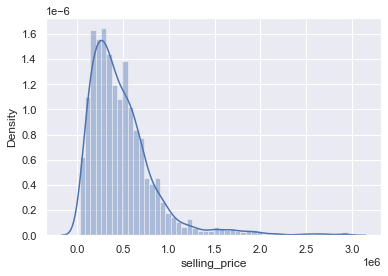

In [41]:
sns.distplot(df_train.loc[df_train['selling_price'] < 0.3 * 1e7, 'selling_price'])

Здесь тоже есть автомобили подороже и подешевле (большинство). Продолжим двигаться в том же направлении

/Users/shapkin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

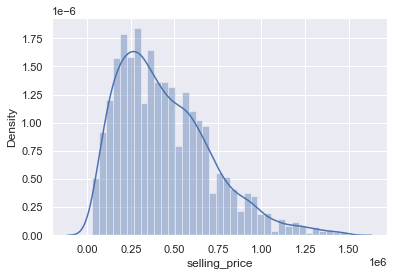

In [42]:
sns.distplot(df_train.loc[df_train['selling_price'] < 1.5 * 1e6, 'selling_price'])

Напоминает хи-квадрат с грамотно подобранными параметрами или Фишера. На этой ошеломительной ноте перейдем к следующему пункту

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [43]:
FEATURES_SUBSET_NUM_NO_TARGET = [feat for feat in FEATURES_SUBSET_NUM if feat != 'selling_price']

In [44]:
y_train = df_train['selling_price']
X_train = df_train[FEATURES_SUBSET_NUM_NO_TARGET]

In [45]:
assert X_train.shape == (5840, 6)

In [46]:
y_test = df_test['selling_price']
X_test = df_test[FEATURES_SUBSET_NUM_NO_TARGET]

In [47]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [48]:
X_test_filled = X_test.fillna(value=fill_dict)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

base_model = LinearRegression()
base_model.fit(X_train, y_train)
pred_train = base_model.predict(X_train)
pred_test = base_model.predict(X_test_filled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.5915050767325436
MSE TRAIN: 117090306033.0161

R2 score TEST: 0.5937024338674333
MSE TEST: 233551443099.39868


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test_filled)

scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
pred_train = scaled_model.predict(X_train_scaled)
pred_test = scaled_model.predict(X_test_scaled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.591505076732544
MSE TRAIN: 117090306033.01596

R2 score TEST: 0.5937024338674468
MSE TEST: 233551443099.39087


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [51]:
np.argsort(scaled_model.coef_), scaled_model.coef_

(array([1, 5, 2, 3, 0, 4]),
 array([152413.79476422, -44299.63423595,  28483.92002949,  60671.64467376,
        322577.60527069, -22512.60179359]))

In [52]:
X_train.columns[np.argsort(np.abs(scaled_model.coef_))[-1]]

'max_power'

Признак max_power оказался наиболее информативным в предсказании цены

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [53]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
pred_train = lasso_model.predict(X_train_scaled)
pred_test = lasso_model.predict(X_test_scaled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.5915050766972044
MSE TRAIN: 117090306043.14563

R2 score TEST: 0.5937012618474564
MSE TEST: 233552116809.94913


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [54]:
lasso_model.coef_

array([152413.608387  , -44298.50504536,  28482.03984137,  60666.793474  ,
       322578.50839763, -22509.71482318])

Нет, не занулила. Скорее всего связано это с тем, что признаков и так не очень много и все они играют важную роль в предсказании

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

lasso_model = Lasso()
parameters_grid = {
    'alpha': [0, 0.5, 1, 2, 10, 100, 1000, 10000], 
    'tol': [1e-2, 1e-4, 1e-6, 1e-8],
    'max_iter': [10, 1000, 10000]
}
grid_search = GridSearchCV(estimator=lasso_model, param_grid=parameters_grid,
                           cv=10, scoring='r2')

In [56]:
grid_search.fit(X_train_scaled, y_train)
df = pd.DataFrame(grid_search.cv_results_)

In [57]:
df.sort_values(by='mean_test_score').loc[:, ['param_max_iter', 'param_alpha', 'param_tol', 'mean_test_score']].tail()

,param_max_iter,param_alpha,param_tol,mean_test_score
93,10000,10000,0.0001,0.572313
91,1000,10000,1e-08,0.572316
95,10000,10000,1e-08,0.572316
94,10000,10000,1e-06,0.572316
90,1000,10000,1e-06,0.572316


In [58]:
df.shape

(96, 21)

In [59]:
bp = grid_search.best_params_
bp

{'alpha': 10000, 'max_iter': 1000, 'tol': 1e-06}

In [60]:
lasso_model = Lasso(**bp)
lasso_model.fit(X_train_scaled, y_train)
pred_train = lasso_model.predict(X_train_scaled)
pred_test = lasso_model.predict(X_test_scaled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.5885510648358037
MSE TRAIN: 117937039094.58705

R2 score TEST: 0.581224715729851
MSE TEST: 240723991794.08868


In [61]:
lasso_model.coef_

array([151572.72492129, -32830.92875726,   8787.58496328,  17811.79117718,
       328832.41625832,     -0.        ])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Грид-серчу пришлось обучать 8 * 4 * 3 * 10 = 960 моделей. Подбирать гиперпараметры лучше какой-нибудь умной библиотекой вроде hyperopt, основанной на Байесовских методах. Да и у линейной регрессии подбирать особенно нечего

У лучшей из перебранных моделей коэффициент регуляризации = 1000. Модель занулила один из коэффициентов. 
Забавно, что с наилучшими гиперпараметрами (подобранными по сетке) качество на отложенной выборке оказалось хуже, чем с гиперпараметрами по умолчанию. 

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [62]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet()
parameters_grid = {
    'alpha': [0, 0.00001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 4, 10, 100, 1000, 10000, 1000000], 
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'tol': [1e-8]
}
grid_search = GridSearchCV(estimator=elastic_model, param_grid=parameters_grid,
                           cv=10, scoring='r2')

In [63]:
grid_search.fit(X_train_scaled, y_train)
df = pd.DataFrame(grid_search.cv_results_)

In [64]:
df.sort_values(by='mean_test_score').loc[:, ['param_l1_ratio', 'param_alpha', 'param_tol', 'mean_test_score']].tail()

,param_l1_ratio,param_alpha,param_tol,mean_test_score
86,0.9,1,1e-08,0.575632
58,0.3,0.25,1e-08,0.576010
60,0.5,0.25,1e-08,0.576145
59,0.4,0.25,1e-08,0.576252
73,0.7,0.5,1e-08,0.576252


In [65]:
bp = grid_search.best_params_
bp

{'alpha': 0.5, 'l1_ratio': 0.7, 'tol': 1e-08}

In [66]:
elastic_model = ElasticNet(**bp)
elastic_model.fit(X_train_scaled, y_train)
pred_train = elastic_model.predict(X_train_scaled)
pred_test = elastic_model.predict(X_test_scaled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.583801679679107
MSE TRAIN: 119298394964.12416

R2 score TEST: 0.5610652543897108
MSE TEST: 252312225838.69055


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

{'alpha': 0.5, 'l1_ratio': 0.7} и {'alpha': 0.25, 'l1_ratio': 0.4} - наборы гиперпараметров, показавшие одинаково лучшие оценки при подборе гиперпараметров по сетке с кросс-валидацией. Интересно, что качество на отложенной выборке опять же упало

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [67]:
FEATURES_SUBSET_NUM_NO_TARGET = [feat for feat in FEATURES_SUBSET_NUM if feat != 'selling_price']
FEATURES_SUBSET_OBJ_NO_NAME = [feat for feat in FEATURES_SUBSET_OBJ if feat != 'name']
FEATURES_SUBSET_ALL = FEATURES_SUBSET_OBJ_NO_NAME + FEATURES_SUBSET_NUM_NO_TARGET

X_train_cat = df_train[FEATURES_SUBSET_ALL]
X_test_cat = df_test[FEATURES_SUBSET_ALL]

In [68]:
assert X_train_cat.shape == (5840, 10)
assert X_test_cat.shape == (1000, 10)

In [69]:
X_test_cat = X_test_cat.fillna(value=fill_dict)

In [70]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [71]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer


# your code here
to_ohe_list = FEATURES_SUBSET_OBJ_NO_NAME + ['seats']
to_scale_list = [feat for feat in FEATURES_SUBSET_NUM_NO_TARGET if feat != 'seats']

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, to_scale_list),
        ("cat", ohe, to_ohe_list),
    ]
)

X_train_transformed = features_preprocessor.fit_transform(X_train_cat)
X_test_transformed = features_preprocessor.transform(X_test_cat)

In [72]:
X_test_transformed.shape, X_train_transformed.shape

((1000, 23), (5840, 23))

In [73]:
lasso_model = Lasso()
lasso_model.fit(X_train_transformed, y_train)
pred_train = lasso_model.predict(X_train_transformed)
pred_test = lasso_model.predict(X_test_transformed)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.6667132901961415
MSE TRAIN: 95532748694.94516

R2 score TEST: 0.6256533380516639
MSE TEST: 215185150995.83502


Качество подросло, но похоже модель переобучилась. Нужна регуляризация

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [74]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
parameters_grid = {
    'alpha': [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 5, 10, 100, 1000, 10000, 100000, 1000000]
}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=parameters_grid,
                           cv=10, scoring='r2')

In [75]:
grid_search.fit(X_train_transformed, y_train)
df = pd.DataFrame(grid_search.cv_results_)

In [76]:
df.sort_values(by='mean_test_score').loc[:, ['param_alpha', 'mean_test_score']].tail()

,param_alpha,mean_test_score
7,1,0.618892
8,2,0.620296
9,3,0.620990
10,5,0.621536
11,10,0.621649


In [77]:
bp = grid_search.best_params_
bp

{'alpha': 10}

In [78]:
ridge_model = Ridge(**bp)
ridge_model.fit(X_train_transformed, y_train)
pred_train = ridge_model.predict(X_train_transformed)
pred_test = ridge_model.predict(X_test_transformed)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.6532166758887378
MSE TRAIN: 99401395793.47662

R2 score TEST: 0.645198314775084
MSE TEST: 203950140255.92444


Можно видеть, что регуляризация помогла улучшить обобщающую способность модели - результат на отложенной выборке стал лучше и почти сравнялся с результатом на трейне.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

**Подготовка**

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

max_torque_rpm_arr, torque_only_arr = parse_torque(df_test_copy)
df_test_copy['max_torque_rpm'] = max_torque_rpm_arr
df_test_copy['torque_only'] = torque_only_arr

In [80]:
y_train = df_train_copy['selling_price']
y_test = df_test_copy['selling_price']

df_train_features = df_train_copy.drop(columns=['selling_price', 'torque'])
df_test_features = df_test_copy.drop(columns=['selling_price', 'torque'])
print(df_train_features.shape), print(df_test_features.shape)
df_train_features.head()

(5840, 13)
(1000, 13)


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque_rpm,torque_only
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2000.0,190.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2500.0,250.000000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2750.0,219.668960
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,4500.0,112.776475
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,4000.0,113.750000


**Добавим новый признак на основе названия автомобиля** 

In [81]:
fill_nans_data = {
    'mileage': df_train_features['mileage'].median(), 
    'engine': df_train_features['engine'].median(), 
    'max_power': df_train_features['max_power'].median(), 
    'seats': df_train_features['seats'].median(), 
    'max_torque_rpm': df_train_features['max_torque_rpm'].median(), 
    'torque_only': df_train_features['torque_only'].median()
}
df_train_features_filled = df_train_features.fillna(value=fill_nans_data)
df_test_features_filled = df_test_features.fillna(value=fill_nans_data)

In [82]:
df_train_features_filled['name'] = df_train_features_filled['name'].apply(lambda x: x.split()[0].lower())
df_test_features_filled['name'] = df_test_features_filled['name'].apply(lambda x: x.split()[0].lower())

In [83]:
df_train_features_filled.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque_rpm,torque_only
0,maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2000.0,190.000000
1,skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2500.0,250.000000
2,hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2750.0,219.668960
3,maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,4500.0,112.776475
4,hyundai,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,4000.0,113.750000


In [84]:
FEATURES_SUBSET_OBJ = []
for fn, dt in df_train_features_filled.dtypes.iteritems():
    if 'object' in str(dt):
        if 'fn' != 'torque':
            FEATURES_SUBSET_OBJ.append(fn)
FEATURES_SUBSET_OBJ.append('seats')
        
FEATURES_SUBSET_NUM = []
for fn, dt in df_train_features_filled.dtypes.iteritems():
    if 'int' in str(dt) or 'float' in str(dt):
        if fn != 'seats':
            FEATURES_SUBSET_NUM.append(fn)

In [85]:
FEATURES_SUBSET_OBJ, FEATURES_SUBSET_NUM

(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats'],
 ['year',
  'km_driven',
  'mileage',
  'engine',
  'max_power',
  'max_torque_rpm',
  'torque_only'])

In [86]:
# your code here
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_features_filled, y_train)
pred_train = pipe.predict(df_train_features_filled)
pred_test = pipe.predict(df_test_features_filled)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7471666997281617
MSE TRAIN: 72471717071.46031

R2 score TEST: 0.7449034576447682
MSE TEST: 146636776990.4192


Заметно улучшили качество за счет имени автомобиля и парсинга строки torque! Good job! Двигаемся дальше

**Добавим dummy признаки для nan значений**

In [87]:
def preprocess_data(df, fill_medians):
    max_torque_rpm_arr, torque_only_arr = parse_torque(df)
    df['max_torque_rpm'] = max_torque_rpm_arr
    df['torque_only'] = torque_only_arr
    df = df.drop(columns=['selling_price', 'torque'])
    
    df['nan_mileage'] = 0 
    df.loc[df['mileage'].isna(), 'nan_mileage'] = 1
    
    df['nan_engine'] = 0 
    df.loc[df['engine'].isna(), 'nan_engine'] = 1
    
    df['nan_max_power'] = 0 
    df.loc[df['max_power'].isna(), 'nan_max_power'] = 1
    
    df['nan_seats'] = 0 
    df.loc[df['seats'].isna(), 'nan_seats'] = 1
    
    df['nan_max_torque_rpm'] = 0 
    df.loc[df['max_torque_rpm'].isna(), 'nan_max_torque_rpm'] = 1
    
    df['nan_torque_only'] = 0
    df.loc[df['torque_only'].isna(), 'nan_torque_only'] = 1
    
    df['name'] = df['name'].apply(lambda x: x.split()[0].lower())
    
    df = df.fillna(value=fill_medians)
    return df

In [88]:
df_train_new = preprocess_data(df_train_copy, fill_nans_data)
df_test_new = preprocess_data(df_test_copy, fill_nans_data)

In [89]:
FEATURES_SUBSET_OTHER = ['nan_mileage', 'nan_engine', 'nan_max_power', 'nan_seats', 
                         'nan_max_torque_rpm', 'nan_torque_only']

In [90]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7474570512908005
MSE TRAIN: 72388491182.00592

R2 score TEST: 0.7450637637099848
MSE TEST: 146544628486.49063


Еще небольшой прирост к качеству! Идем дальше

**Добавим бинаризацию признака year**

In [91]:
def preprocess_data(df, fill_medians):
    max_torque_rpm_arr, torque_only_arr = parse_torque(df)
    df['max_torque_rpm'] = max_torque_rpm_arr
    df['torque_only'] = torque_only_arr
    df = df.drop(columns=['selling_price', 'torque'])
    
    df['nan_mileage'] = 0 
    df.loc[df['mileage'].isna(), 'nan_mileage'] = 1
    
    df['nan_engine'] = 0 
    df.loc[df['engine'].isna(), 'nan_engine'] = 1
    
    df['nan_max_power'] = 0 
    df.loc[df['max_power'].isna(), 'nan_max_power'] = 1
    
    df['nan_seats'] = 0 
    df.loc[df['seats'].isna(), 'nan_seats'] = 1
    
    df['nan_max_torque_rpm'] = 0 
    df.loc[df['max_torque_rpm'].isna(), 'nan_max_torque_rpm'] = 1
    
    df['nan_torque_only'] = 0
    df.loc[df['torque_only'].isna(), 'nan_torque_only'] = 1
    
    df['name'] = df['name'].apply(lambda x: x.split()[0].lower())
    
    df['year_old'] = 0
    df.loc[(df['year'] < 1990), 'year_old'] = 1
    df['year_90'] = 0
    df.loc[(df['year'] < 2000) & ((df['year'] >= 1990)), 'year_90'] = 1
    df['year_00'] = 0
    df.loc[(df['year'] < 2010) & ((df['year'] >= 2000)), 'year_00'] = 1
    df['year_10'] = 0
    df.loc[(df['year'] < 2020) & ((df['year'] >= 2010)), 'year_10'] = 1
    df['year_new'] = 0
    df.loc[(df['year'] >= 2020), 'year_new'] = 1
    
    df = df.fillna(value=fill_medians)
    return df

In [92]:
df_train_new = preprocess_data(df_train_copy, fill_nans_data)
df_test_new = preprocess_data(df_test_copy, fill_nans_data)

In [93]:
FEATURES_SUBSET_OTHER = ['nan_mileage', 'nan_engine', 'nan_max_power', 'nan_seats', 
                         'nan_max_torque_rpm', 'nan_torque_only', 'year_old', 
                         'year_90', 'year_00', 'year_10', 'year_new']

In [94]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7543732767621358
MSE TRAIN: 70406035805.19386

R2 score TEST: 0.7508866527486886
MSE TEST: 143197465590.72955


Ура! Качество еще немного подросло! 

**Добавим в выборку нелинейные комбинации признаков**

In [95]:
def preprocess_data(df, fill_medians):
    max_torque_rpm_arr, torque_only_arr = parse_torque(df)
    df['max_torque_rpm'] = max_torque_rpm_arr
    df['torque_only'] = torque_only_arr
    df = df.drop(columns=['selling_price', 'torque'])
    
    df['nan_mileage'] = 0 
    df.loc[df['mileage'].isna(), 'nan_mileage'] = 1
    
    df['nan_engine'] = 0 
    df.loc[df['engine'].isna(), 'nan_engine'] = 1
    
    df['nan_max_power'] = 0 
    df.loc[df['max_power'].isna(), 'nan_max_power'] = 1
    
    df['nan_seats'] = 0 
    df.loc[df['seats'].isna(), 'nan_seats'] = 1
    
    df['nan_max_torque_rpm'] = 0 
    df.loc[df['max_torque_rpm'].isna(), 'nan_max_torque_rpm'] = 1
    
    df['nan_torque_only'] = 0
    df.loc[df['torque_only'].isna(), 'nan_torque_only'] = 1
    
    df['name'] = df['name'].apply(lambda x: x.split()[0].lower())
    
    df['year_old'] = 0
    df.loc[(df['year'] < 1990), 'year_old'] = 1
    df['year_90'] = 0
    df.loc[(df['year'] < 2000) & ((df['year'] >= 1990)), 'year_90'] = 1
    df['year_00'] = 0
    df.loc[(df['year'] < 2010) & ((df['year'] >= 2000)), 'year_00'] = 1
    df['year_10'] = 0
    df.loc[(df['year'] < 2020) & ((df['year'] >= 2010)), 'year_10'] = 1
    df['year_new'] = 0
    df.loc[(df['year'] >= 2020), 'year_new'] = 1
    
    df = df.fillna(value=fill_medians)
    
    # этим также неявно добавили произведения и умножения данных признаков (тк log ab = log a + log b)
    df['log_km_driven'] = df['km_driven'].apply(lambda x: np.log(x + 1))
    df['log_engine'] = df['engine'].apply(lambda x: np.log(x + 1))
    df['log_max_power'] = df['max_power'].apply(lambda x: np.log(x + 1))
    df['log_mileage'] = df['mileage'].apply(lambda x: np.log(x + 1))
    df['year_old_seats'] = df.apply(lambda x: int(x.year_old * x.seats), axis=1)
    df['year_90_seats'] = df.apply(lambda x: int(x.year_90 * x.seats), axis=1)
    df['year_00_seats'] = df.apply(lambda x: int(x.year_00 * x.seats), axis=1)
    df['year_10_seats'] = df.apply(lambda x: int(x.year_10 * x.seats), axis=1)
    df['year_new_seats'] = df.apply(lambda x: int(x.year_new * x.seats), axis=1)
    return df

In [96]:
FEATURES_SUBSET_OTHER += ['year_old_seats', 'year_90_seats', 'year_00_seats', 
                          'year_10_seats', 'year_new_seats']

FEATURES_SUBSET_NUM += ['log_km_driven', 'log_engine', 'log_max_power', 'log_mileage']

In [97]:
df_train_new = preprocess_data(df_train_copy, fill_nans_data)
df_test_new = preprocess_data(df_test_copy, fill_nans_data)

In [98]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7667323461246142
MSE TRAIN: 66863452699.48322

R2 score TEST: 0.7661633099247792
MSE TEST: 134416006811.2137


**Теперь поизучаем выбросы на численных признаках**

In [99]:
df_train_new['mileage'].max(), df_train_new['mileage'].min() 

(42.0, 0.0)

In [100]:
df_train_new['engine'].max(), df_train_new['engine'].min() 

(3604.0, 624.0)

In [101]:
df_train_new['max_power'].max(), df_train_new['max_power'].min() 

(400.0, 0.0)

In [102]:
df_train_new['max_torque_rpm'].max(), df_train_new['max_power'].min() 

(21800.0, 0.0)

Значения, равные 0 кажутся аномальными в этом случае. Добавим отдельные бинарные признаки на этот случай

In [103]:
def preprocess_data(df, fill_medians):
    max_torque_rpm_arr, torque_only_arr = parse_torque(df)
    df['max_torque_rpm'] = max_torque_rpm_arr
    df['torque_only'] = torque_only_arr
    df = df.drop(columns=['selling_price', 'torque'])
    
    df['nan_mileage'] = 0 
    df.loc[df['mileage'].isna(), 'nan_mileage'] = 1
    
    df['nan_engine'] = 0 
    df.loc[df['engine'].isna(), 'nan_engine'] = 1
    
    df['nan_max_power'] = 0 
    df.loc[df['max_power'].isna(), 'nan_max_power'] = 1
    
    df['nan_seats'] = 0 
    df.loc[df['seats'].isna(), 'nan_seats'] = 1
    
    df['nan_max_torque_rpm'] = 0 
    df.loc[df['max_torque_rpm'].isna(), 'nan_max_torque_rpm'] = 1
    
    df['nan_torque_only'] = 0
    df.loc[df['torque_only'].isna(), 'nan_torque_only'] = 1
    
    df['name'] = df['name'].apply(lambda x: x.split()[0].lower())
    
    df['year_old'] = 0
    df.loc[(df['year'] < 1990), 'year_old'] = 1
    df['year_90'] = 0
    df.loc[(df['year'] < 2000) & ((df['year'] >= 1990)), 'year_90'] = 1
    df['year_00'] = 0
    df.loc[(df['year'] < 2010) & ((df['year'] >= 2000)), 'year_00'] = 1
    df['year_10'] = 0
    df.loc[(df['year'] < 2020) & ((df['year'] >= 2010)), 'year_10'] = 1
    df['year_new'] = 0
    df.loc[(df['year'] >= 2020), 'year_new'] = 1
    
    df = df.fillna(value=fill_medians)
    
    # этим также неявно добавили произведения и умножения данных признаков (тк log ab = log a + log b)
    df['log_km_driven'] = df['km_driven'].apply(lambda x: np.log(x + 1))
    df['log_engine'] = df['engine'].apply(lambda x: np.log(x + 1))
    df['log_max_power'] = df['max_power'].apply(lambda x: np.log(x + 1))
    df['log_mileage'] = df['mileage'].apply(lambda x: np.log(x + 1))
    df['year_old_seats'] = df.apply(lambda x: int(x.year_old * x.seats), axis=1)
    df['year_90_seats'] = df.apply(lambda x: int(x.year_90 * x.seats), axis=1)
    df['year_00_seats'] = df.apply(lambda x: int(x.year_00 * x.seats), axis=1)
    df['year_10_seats'] = df.apply(lambda x: int(x.year_10 * x.seats), axis=1)
    df['year_new_seats'] = df.apply(lambda x: int(x.year_new * x.seats), axis=1)
    
    df['0mileage'] = 0
    df.loc[(df['mileage'] == 0.0), '0mileage'] = 1
    df['0max_power'] = 0
    df.loc[(df['max_power'] == 0.0), '0max_power'] = 1
    df['0max_torque_rpm'] = 0
    df.loc[(df['max_torque_rpm'] == 0.0), '0max_torque_rpm'] = 1
    df['0torque_only'] = 0
    df.loc[(df['torque_only'] == 0.0), '0torque_only'] = 1
    return df

In [104]:
FEATURES_SUBSET_OTHER += ['0mileage', '0max_power', '0max_torque_rpm', 
                          '0torque_only']

In [105]:
df_train_new = preprocess_data(df_train_copy, fill_nans_data)
df_test_new = preprocess_data(df_test_copy, fill_nans_data)

In [106]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"R2 score TRAIN: {r2_score(y_train, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7680909965023581
MSE TRAIN: 66474011412.79737

R2 score TEST: 0.7674610041419773
MSE TEST: 133670055118.68141


Еще чуть выросло! 

**Продолжим изучать, теперь действительно к выбрасам**

In [107]:
df_train_new['km_driven'].max(), df_train_new['km_driven'].min() 

(2360457, 1)

Число максимум кажется аномальным... В 1993 году пробег в 1 442 044 миль (2 320 744 км) был занесен в Книгу рекордов Гиннеса. Рассмотрим много ли таких примеров

In [108]:
df_train_new[df_train_new['km_driven'] > 500000]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,log_mileage,year_old_seats,year_90_seats,year_00_seats,year_10_seats,year_new_seats,0mileage,0max_power,0max_torque_rpm,0torque_only
1397,mahindra,2012,1500000,Diesel,Individual,Manual,First Owner,15.1,2179.0,140.00,...,2.778819,0,0,0,7,0,0,0,0,0
2680,hyundai,2007,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,...,2.975530,0,0,5,0,0,0,0,0,0
2700,maruti,2010,577414,Petrol,Individual,Manual,Second Owner,18.9,1061.0,67.00,...,2.990720,0,0,0,5,0,0,0,0,0


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

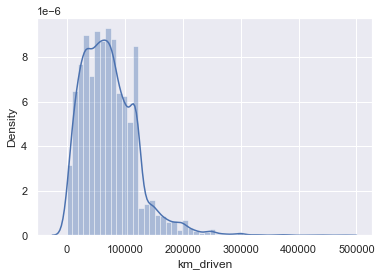

In [109]:
sns.distplot(df_train_new.loc[(df_train_new['km_driven'] < 500000), 'km_driven'])

Выбросим из обучающей выборки все объекты, пробег у которых больше 300 000

In [110]:
y_train_new = y_train[np.array((df_train_new['km_driven'] < 300000))]
df_train_new = df_train_new.loc[(df_train_new['km_driven'] < 300000), :]

In [111]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train_new)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"R2 score TRAIN: {r2_score(y_train_new, pred_train)}")
print(f"MSE TRAIN: {MSE(y_train_new, pred_train)}\n")

print(f"R2 score TEST: {r2_score(y_test, pred_test)}")
print(f"MSE TEST: {MSE(y_test, pred_test)}")

R2 score TRAIN: 0.7686461354171857
MSE TRAIN: 66532304558.357445

R2 score TEST: 0.7678434430848514
MSE TEST: 133450218293.52916


Немного помогло, но не значительно

**Модернизируем таргет**

Вспомним визуализации раньше - у нас есть объекты разных классов. В задачке с предсказанием ценой нам не катастрофично ошибиться в копейках, но катастрафично в масштабах цены. На помощь приходит предсказание логарифма

In [112]:
y_train_new_log = np.log(1 + y_train_new)
y_test_new = np.log(1 + y_test)

In [113]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train_new_log)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"Log R2 score TRAIN: {r2_score(y_train_new_log, pred_train)}")
print(f"Log MSE TRAIN: {MSE(y_train_new_log, pred_train)}\n")

print(f"Log R2 score TEST: {r2_score(y_test_new, pred_test)}")
print(f"Log MSE TEST: {MSE(y_test_new, pred_test)}")

Log R2 score TRAIN: 0.8927733573759967
Log MSE TRAIN: 0.06281854855597829

Log R2 score TEST: 0.9178576462013365
Log MSE TEST: 0.05875659637288829


In [114]:
print(f"Orig R2 score TRAIN: {r2_score(y_train_new, np.exp(pred_train) - 1)}")
print(f"Orig MSE TRAIN: {MSE(y_train_new, np.exp(pred_train) - 1)}\n")

print(f"Orig R2 score TEST: {r2_score(y_test, np.exp(pred_test) - 1)}")
print(f"Orig MSE TEST: {MSE(y_test, np.exp(pred_test) - 1)}")

Orig R2 score TRAIN: 0.8826690397240438
Orig MSE TRAIN: 33741814502.563286

Orig R2 score TEST: 0.8781378319908498
Orig MSE TEST: 70049854023.66924


Кажется, это победа! Качество уже не стыдно показать заказчику. Осталось красиво оформить отчет и сказать что наша модель опережает конкурентов. Идем дальше

# Итоговая модель

In [115]:
# массивы с разными категориями признаков
FEATURES_SUBSET_NUM = FEATURES_SUBSET_NUM
FEATURES_SUBSET_OBJ = FEATURES_SUBSET_OBJ
FEATURES_SUBSET_OTHER = FEATURES_SUBSET_OTHER
fill_nans_data = fill_nans_data

In [116]:
def preprocess_data(df, fill_medians):
    max_torque_rpm_arr, torque_only_arr = parse_torque(df)
    df['max_torque_rpm'] = max_torque_rpm_arr
    df['torque_only'] = torque_only_arr
    
    if 'selling_price' in df.columns.to_list():
        df = df.drop(columns=['selling_price'])
    if 'torque' in df.columns.to_list():
        df = df.drop(columns=['torque'])
    
    df['nan_mileage'] = 0 
    df.loc[df['mileage'].isna(), 'nan_mileage'] = 1
    
    df['nan_engine'] = 0 
    df.loc[df['engine'].isna(), 'nan_engine'] = 1
    
    df['nan_max_power'] = 0 
    df.loc[df['max_power'].isna(), 'nan_max_power'] = 1
    
    df['nan_seats'] = 0 
    df.loc[df['seats'].isna(), 'nan_seats'] = 1
    
    df['nan_max_torque_rpm'] = 0 
    df.loc[df['max_torque_rpm'].isna(), 'nan_max_torque_rpm'] = 1
    
    df['nan_torque_only'] = 0
    df.loc[df['torque_only'].isna(), 'nan_torque_only'] = 1
    
    df['name'] = df['name'].apply(lambda x: x.split()[0].lower())
    
    df['year_old'] = 0
    df.loc[(df['year'] < 1990), 'year_old'] = 1
    df['year_90'] = 0
    df.loc[(df['year'] < 2000) & ((df['year'] >= 1990)), 'year_90'] = 1
    df['year_00'] = 0
    df.loc[(df['year'] < 2010) & ((df['year'] >= 2000)), 'year_00'] = 1
    df['year_10'] = 0
    df.loc[(df['year'] < 2020) & ((df['year'] >= 2010)), 'year_10'] = 1
    df['year_new'] = 0
    df.loc[(df['year'] >= 2020), 'year_new'] = 1
    
    df = df.fillna(value=fill_medians)
    df['mileage'] = df['mileage'].apply(lambda x: float(str(x).split()[0]))
    df['engine'] = df['engine'].apply(lambda x: float(str(x).split()[0]))
    df['max_power'] = df['max_power'].apply(lambda x: str(x).strip())
    df['max_power'] = df['max_power'].apply(lambda x: float(x.split()[0]) if x[0] != 'b' else 0)
    df['seats'] = df['seats'].apply(lambda x: int(x))
    df['engine'] = df['engine'].apply(lambda x: int(x))
    
    # этим также неявно добавили произведения и умножения данных признаков (тк log ab = log a + log b)
    df['log_km_driven'] = df['km_driven'].apply(lambda x: np.log(x + 1))
    df['log_engine'] = df['engine'].apply(lambda x: np.log(x + 1))
    df['log_max_power'] = df['max_power'].apply(lambda x: np.log(x + 1))
    df['log_mileage'] = df['mileage'].apply(lambda x: np.log(x + 1))
    df['year_old_seats'] = df.apply(lambda x: int(x.year_old * x.seats), axis=1)
    df['year_90_seats'] = df.apply(lambda x: int(x.year_90 * x.seats), axis=1)
    df['year_00_seats'] = df.apply(lambda x: int(x.year_00 * x.seats), axis=1)
    df['year_10_seats'] = df.apply(lambda x: int(x.year_10 * x.seats), axis=1)
    df['year_new_seats'] = df.apply(lambda x: int(x.year_new * x.seats), axis=1)
    
    df['0mileage'] = 0
    df.loc[(df['mileage'] == 0.0), '0mileage'] = 1
    df['0max_power'] = 0
    df.loc[(df['max_power'] == 0.0), '0max_power'] = 1
    df['0max_torque_rpm'] = 0
    df.loc[(df['max_torque_rpm'] == 0.0), '0max_torque_rpm'] = 1
    df['0torque_only'] = 0
    df.loc[(df['torque_only'] == 0.0), '0torque_only'] = 1
    return df

In [117]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

In [118]:
y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [119]:
df_train_new = preprocess_data(df_train, fill_nans_data)
df_test_new = preprocess_data(df_test, fill_nans_data)

In [120]:
y_train_new = y_train[np.array((df_train_new['km_driven'] < 300000))]
df_train_new = df_train_new.loc[(df_train_new['km_driven'] < 300000), :]

In [121]:
y_train_new_log = np.log(1 + y_train_new)
y_test_new = np.log(1 + y_test)

In [122]:
ridge_model = Ridge(alpha=10.0)
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
minmax = MinMaxScaler()

features_preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, FEATURES_SUBSET_NUM),
        ("cat", ohe, FEATURES_SUBSET_OBJ),
        ("other", minmax, FEATURES_SUBSET_OTHER)
    ]
)

pipe = Pipeline([('transform', features_preprocessor), ('ridge', ridge_model)])
pipe.fit(df_train_new, y_train_new_log)
pred_train = pipe.predict(df_train_new)
pred_test = pipe.predict(df_test_new)

print(f"Log R2 score TRAIN: {r2_score(y_train_new_log, pred_train)}")
print(f"Log MSE TRAIN: {MSE(y_train_new_log, pred_train)}\n")

print(f"Log R2 score TEST: {r2_score(y_test_new, pred_test)}")
print(f"Log MSE TEST: {MSE(y_test_new, pred_test)}")

Log R2 score TRAIN: 0.91607089310319
Log MSE TRAIN: 0.058788647810771213

Log R2 score TEST: 0.9208348519934525
Log MSE TEST: 0.05662699488283178


In [123]:
print(f"Orig R2 score TRAIN: {r2_score(y_train_new, np.exp(pred_train) - 1)}")
print(f"Orig MSE TRAIN: {MSE(y_train_new, np.exp(pred_train) - 1)}\n")

print(f"Orig R2 score TEST: {r2_score(y_test, np.exp(pred_test) - 1)}")
print(f"Orig MSE TEST: {MSE(y_test, np.exp(pred_test) - 1)}")

Orig R2 score TRAIN: 0.9347001613577549
Orig MSE TRAIN: 42854410606.66165

Orig R2 score TEST: 0.933854061556745
Orig MSE TEST: 38022574256.68575


### Сохраняем модель и необходимые данные, чтобы их не пересчитывать в будущем

In [124]:
import joblib
import os

if not os.path.exists('data/model'):
    os.mkdir('data/model')

In [125]:
joblib.dump(pipe, 'data/model/pipeline.pkl', compress = 1)
joblib.dump(FEATURES_SUBSET_NUM, 'data/model/num_feature_list.pkl', compress = 1)
joblib.dump(FEATURES_SUBSET_OBJ, 'data/model/obj_feature_list.pkl', compress = 1)
joblib.dump(FEATURES_SUBSET_OTHER, 'data/model/other_feature_list.pkl', compress = 1)
joblib.dump(fill_nans_data, 'data/model/fill_nan_dict.pkl', compress = 1)
print('Done')

Done


In [126]:
FEATURES_SUBSET_NUM_load = joblib.load('data/model/num_feature_list.pkl')
FEATURES_SUBSET_OBJ_load = joblib.load('data/model/obj_feature_list.pkl')
FEATURES_SUBSET_OTHER_load = joblib.load('data/model/other_feature_list.pkl')
fill_nans_data_load = joblib.load('data/model/fill_nan_dict.pkl')
pipe_loaded = joblib.load('data/model/pipeline.pkl')

In [127]:
assert FEATURES_SUBSET_NUM_load == FEATURES_SUBSET_NUM
assert FEATURES_SUBSET_OBJ_load == FEATURES_SUBSET_OBJ
assert FEATURES_SUBSET_OTHER_load == FEATURES_SUBSET_OTHER
assert fill_nans_data_load == fill_nans_data

In [128]:
pred_train = pipe_loaded.predict(df_train_new)
pred_test = pipe_loaded.predict(df_test_new)

print(f"Orig R2 score TRAIN: {r2_score(y_train_new, np.exp(pred_train) - 1)}")
print(f"Orig MSE TRAIN: {MSE(y_train_new, np.exp(pred_train) - 1)}\n")

print(f"Orig R2 score TEST: {r2_score(y_test, np.exp(pred_test) - 1)}")
print(f"Orig MSE TEST: {MSE(y_test, np.exp(pred_test) - 1)}")

Orig R2 score TRAIN: 0.9347001613577549
Orig MSE TRAIN: 42854410606.66165

Orig R2 score TEST: 0.933854061556745
Orig MSE TEST: 38022574256.68575


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [129]:
def business_metrics(y_true, y_pred):
    abs_diff = np.abs(y_true - y_pred)
    rel = abs_diff / y_true
    ans = np.sum(rel <= 0.1) / len(y_true)
    return ans

print(f"TRAIN BUSINESS METRIC: {business_metrics(y_train_new, np.exp(pred_train) - 1)}")
print(f"TEST BUSINESS METRIC: {business_metrics(y_test, np.exp(pred_test) - 1)}")

TRAIN BUSINESS METRIC: 0.34795698924731183
TEST BUSINESS METRIC: 0.357


Очень приятное задание и очень неприятные метрики :)

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [130]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    pass


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    pass

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link